In [47]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import sidetable
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as seabornInstance

In [48]:
df=pd.read_csv('/content/country_vaccinations.csv')
df1=pd.read_csv("/content/country_vaccinations_by_manufacturer.csv")

In [49]:
df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [50]:
df1.head()

,location,date,vaccine,total_vaccinations
0,Argentina,2020-12-29,Moderna,2
1,Argentina,2020-12-29,Oxford/AstraZeneca,3
2,Argentina,2020-12-29,Sinopharm/Beijing,1
3,Argentina,2020-12-29,Sputnik V,20481
4,Argentina,2020-12-30,Moderna,2


In [51]:
indices=df.loc[df['total_vaccinations']< (df['people_vaccinated'] + df['people_fully_vaccinated'] )].index
indices

Int64Index([  265,   308,   321,   323,   325,   329,   331,   336,   338,
              339,
            ...
            85701, 85707, 85712, 85719, 85725, 85729, 85746, 85756, 85968,
            86076],
           dtype='int64', length=8315)

In [52]:
df.loc[df.index.isin(indices),'total_vaccinations'] = df.loc[df.index,'people_vaccinated']+df.loc[df.index,'people_fully_vaccinated']

In [53]:
indices=df.loc[ (df['total_vaccinations']< df['people_fully_vaccinated']) & df['people_vaccinated'].isnull()].index
indices

Int64Index([], dtype='int64')

In [54]:
df.loc[df.index.isin(indices),'total_vaccinations'] = df.loc[df.index,'people_fully_vaccinated']

In [55]:
indices=df.loc[df['total_vaccinations']> (df['people_vaccinated'] + df['people_fully_vaccinated'] )].index
indices

Int64Index([  691,   694,   695,   697,   698,   699,   702,   704,   705,
              706,
            ...
            86502, 86503, 86504, 86505, 86506, 86507, 86508, 86509, 86510,
            86511],
           dtype='int64', length=13147)

In [56]:
df.loc[df.index.isin(indices),'total_vaccinations'] = df.loc[df.index,'people_vaccinated']+df.loc[df.index,'people_fully_vaccinated']
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                     42905
people_vaccinated                      45218
people_fully_vaccinated                47710
daily_vaccinations_raw                 51150
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
dtype: int64

In [57]:
df_N=df.dropna()
df_N.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
94,Afghanistan,AFG,2021-05-27,593313.0,479574.0,113739.0,2859.0,6487.0,1.49,1.20,0.29,163.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
101,Afghanistan,AFG,2021-06-03,630305.0,481800.0,148505.0,4015.0,5285.0,1.58,1.21,0.37,133.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
339,Afghanistan,AFG,2022-01-27,8386212.0,4517380.0,3868832.0,6868.0,9802.0,12.76,11.34,9.71,246.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
433,Albania,ALB,2021-02-18,3049.0,2438.0,611.0,1348.0,254.0,0.11,0.08,0.02,88.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
515,Albania,ALB,2021-05-11,622507.0,440921.0,181586.0,9548.0,12160.0,21.67,15.35,6.32,4233.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...",Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [58]:
indices= df.loc[(df['daily_vaccinations_raw'].isnull()) & (df['daily_vaccinations'].notnull())].index
indices

Int64Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,
               10,
            ...
            86307, 86308, 86313, 86314, 86318, 86319, 86379, 86380, 86422,
            86423],
           dtype='int64', length=50851)

In [59]:
df.loc[df.index.isin(indices),'daily_vaccinations_raw'] = df.loc[df.index,'daily_vaccinations']

In [60]:
indices= df.loc[(df['total_vaccinations'].isnull()) & (df['people_vaccinated'].notnull()) & (df['people_fully_vaccinated'].notnull())].index
indices

Int64Index([10282, 10568, 10585, 12376, 13368, 34620, 34621, 34622, 34623,
            34624,
            ...
            68500, 68520, 73173, 73677, 73678, 73679, 73683, 73684, 73685,
            81573],
           dtype='int64', length=274)

In [61]:
df.loc[df.index.isin(indices),'total_vaccinations'] = df.loc[df.index,'people_vaccinated']+df.loc[df.index,'people_fully_vaccinated']
indices= df.loc[(df['total_vaccinations']>0) & (df['people_vaccinated'].notnull()) & (df['people_fully_vaccinated'].isnull())].index
indices

Int64Index([    6,    22,    44,    59,   190,   220,   396,   397,   398,
              399,
            ...
            86129, 86130, 86131, 86132, 86133, 86134, 86135, 86136, 86137,
            86138],
           dtype='int64', length=3342)

In [62]:
df.loc[df.index.isin(indices),'people_vaccinated'] = df.loc[df.index,'total_vaccinations']-df.loc[df.index,'people_fully_vaccinated']


In [63]:
df['Prev_vacc'] = df['total_vaccinations'].shift()
df['Prev_code'] = df['iso_code'].shift()
indices=df.loc[(df['total_vaccinations'].isnull()) & (df['Prev_vacc'].notnull()) & (df['daily_vaccinations_raw'].notnull()) & (df['Prev_code'] == df['iso_code'])].index
while (len(indices)>0):
   df.loc[df.index.isin(indices),'total_vaccinations'] = df.loc[df.index,'Prev_vacc']+df.loc[df.index,'daily_vaccinations_raw']
   df['Prev_vacc'] = df['total_vaccinations'].shift()
   indices=df.loc[(df['total_vaccinations'].isnull()) & (df['Prev_vacc'].notnull()) & (df['daily_vaccinations_raw'].notnull())  & (df['Prev_code'] == df['iso_code'])].index

In [64]:
df['Prev_vacc_full'] = df['people_fully_vaccinated'].shift()
indices=df.loc[(df['people_fully_vaccinated'].isnull()) & (df['Prev_vacc_full'].notnull())  & (df['Prev_code'] == df['iso_code'])].index
while (len(indices)>0):
   df.loc[df.index.isin(indices),'people_fully_vaccinated'] = df.loc[df.index,'Prev_vacc_full']
   df['Prev_vacc_full'] = df['people_fully_vaccinated'].shift()
   indices=df.loc[(df['people_fully_vaccinated'].isnull()) & (df['Prev_vacc_full'].notnull())  & (df['Prev_code'] == df['iso_code'])].index
indices= df.loc[(df['total_vaccinations']>0) & (df['people_vaccinated'].isnull()) & (df['people_fully_vaccinated'].notnull())].index
indices
df.loc[df.index.isin(indices),'people_vaccinated'] = df.loc[df.index,'total_vaccinations']-df.loc[df.index,'people_fully_vaccinated']
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                        50
people_vaccinated                      10323
people_fully_vaccinated                10489
daily_vaccinations_raw                   299
daily_vaccinations                       299
total_vaccinations_per_hundred         42905
people_vaccinated_per_hundred          45218
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
Prev_vacc                                 51
Prev_code                                  1
Prev_vacc_full                         10490
dtype: int64

In [65]:
df['day'] =pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
#df['year'] = pd.DatetimeIndex(df['date']).year
df['week_of_year'] =pd.DatetimeIndex(df['date']).weekofyear
df['day_of_year'] =pd.DatetimeIndex(df['date']).dayofyear
df['day_of_week'] =pd.DatetimeIndex(df['date']).dayofweek

<ipython-input-65-ea7fd89666bd>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_of_year'] =pd.DatetimeIndex(df['date']).weekofyear


In [66]:
df.loc[df['iso_code']=='TUN']

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,source_name,source_website,Prev_vacc,Prev_code,Prev_vacc_full,day,month,week_of_year,day_of_year,day_of_week
79107,Tunisia,TUN,2021-03-12,0.0,0.0,NaN,NaN,NaN,0.00,0.00,...,Ministry of Health,https://web.facebook.com/santetunisie.rns.tn/p...,1454868.0,TTO,708762.0,12,3,10,71,4
79108,Tunisia,TUN,2021-03-13,743.0,NaN,NaN,743.0,743.0,0.01,0.01,...,Ministry of Health,https://web.facebook.com/santetunisie.rns.tn/p...,0.0,TUN,NaN,13,3,10,72,5
79109,Tunisia,TUN,2021-03-14,2076.0,NaN,NaN,1333.0,1038.0,0.02,0.02,...,Ministry of Health,https://web.facebook.com/santetunisie.rns.tn/p...,743.0,TUN,NaN,14,3,10,73,6
79110,Tunisia,TUN,2021-03-15,2555.0,NaN,NaN,479.0,852.0,0.02,0.02,...,Ministry of Health,https://web.facebook.com/santetunisie.rns.tn/p...,2076.0,TUN,NaN,15,3,11,74,0
79111,Tunisia,TUN,2021-03-16,3463.0,NaN,NaN,908.0,908.0,NaN,NaN,...,Ministry of Health,https://web.facebook.com/santetunisie.rns.tn/p...,2555.0,TUN,NaN,16,3,11,75,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79477,Tunisia,TUN,2022-03-17,13515439.0,7173774.0,6341665.0,1638.0,1638.0,NaN,NaN,...,Ministry of Health,https://web.facebook.com/santetunisie.rns.tn/p...,13513801.0,TUN,6341665.0,17,3,11,76,3
79478,Tunisia,TUN,2022-03-18,13517100.0,7175435.0,6341665.0,1661.0,1661.0,NaN,NaN,...,Ministry of Health,https://web.facebook.com/santetunisie.rns.tn/p...,13515439.0,TUN,6341665.0,18,3,11,77,4
79479,Tunisia,TUN,2022-03-19,13518783.0,7177118.0,6341665.0,1683.0,1683.0,NaN,NaN,...,Ministry of Health,https://web.facebook.com/santetunisie.rns.tn/p...,13517100.0,TUN,6341665.0,19,3,11,78,5
79480,Tunisia,TUN,2022-03-20,13520489.0,7178824.0,6341665.0,1706.0,1706.0,NaN,NaN,...,Ministry of Health,https://web.facebook.com/santetunisie.rns.tn/p...,13518783.0,TUN,6341665.0,20,3,11,79,6


In [67]:
df['Prev_total_vaccinations_per_hundred'] = df['total_vaccinations_per_hundred'].shift()

In [68]:
indices=df.loc[(df['total_vaccinations_per_hundred'].isnull()) & (df['Prev_total_vaccinations_per_hundred'].notnull())  & (df['Prev_code'] == df['iso_code'])].index
while (len(indices)>0):
   df.loc[df.index.isin(indices),'total_vaccinations_per_hundred'] = df.loc[df.index,'Prev_total_vaccinations_per_hundred']
   df['Prev_total_vaccinations_per_hundred'] = df['total_vaccinations_per_hundred'].shift()
   indices=df.loc[(df['total_vaccinations_per_hundred'].isnull()) & (df['Prev_total_vaccinations_per_hundred'].notnull())  & (df['Prev_code'] == df['iso_code'])].index


In [69]:
df['Prev_people_vaccinated_per_hundred'] = df['people_vaccinated_per_hundred'].shift()
indices=df.loc[(df['people_vaccinated_per_hundred'].isnull()) & (df['Prev_people_vaccinated_per_hundred'].notnull())  & (df['Prev_code'] == df['iso_code'])].index
while (len(indices)>0):
   df.loc[df.index.isin(indices),'people_vaccinated_per_hundred'] = df.loc[df.index,'Prev_people_vaccinated_per_hundred']
   df['Prev_people_vaccinated_per_hundred'] = df['people_vaccinated_per_hundred'].shift()
   indices=df.loc[(df['people_vaccinated_per_hundred'].isnull()) & (df['Prev_people_vaccinated_per_hundred'].notnull())  & (df['Prev_code'] == df['iso_code'])].index

In [70]:
df.isnull().sum()

country                                    0
iso_code                                   0
date                                       0
total_vaccinations                        50
people_vaccinated                      10323
people_fully_vaccinated                10489
daily_vaccinations_raw                   299
daily_vaccinations                       299
total_vaccinations_per_hundred            31
people_vaccinated_per_hundred            787
people_fully_vaccinated_per_hundred    47710
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
Prev_vacc                                 51
Prev_code                                  1
Prev_vacc_full                         10490
day                                        0
month                                      0
week_of_year                               0
day_of_year                                0
day_of_wee

In [71]:
df['Prev_people_fully_vaccinated_per_hundred'] = df['people_fully_vaccinated_per_hundred'].shift()
indices=df.loc[(df['people_fully_vaccinated_per_hundred'].isnull()) & (df['Prev_people_fully_vaccinated_per_hundred'].notnull())  & (df['Prev_code'] == df['iso_code'])].index
while (len(indices)>0):
   df.loc[df.index.isin(indices),'people_fully_vaccinated_per_hundred'] = df.loc[df.index,'Prev_people_fully_vaccinated_per_hundred']
   df['Prev_people_fully_vaccinated_per_hundred'] = df['people_fully_vaccinated_per_hundred'].shift()
   indices=df.loc[(df['people_fully_vaccinated_per_hundred'].isnull()) & (df['Prev_people_fully_vaccinated_per_hundred'].notnull())  & (df['Prev_code'] == df['iso_code'])].index
df.isnull().sum()

country                                         0
iso_code                                        0
date                                            0
total_vaccinations                             50
people_vaccinated                           10323
people_fully_vaccinated                     10489
daily_vaccinations_raw                        299
daily_vaccinations                            299
total_vaccinations_per_hundred                 31
people_vaccinated_per_hundred                 787
people_fully_vaccinated_per_hundred         10489
daily_vaccinations_per_million                299
vaccines                                        0
source_name                                     0
source_website                                  0
Prev_vacc                                      51
Prev_code                                       1
Prev_vacc_full                              10490
day                                             0
month                                           0


In [72]:
df.loc[(df['daily_vaccinations_raw'].isnull()) & (df['daily_vaccinations'].isnull())]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,Prev_code,Prev_vacc_full,day,month,week_of_year,day_of_year,day_of_week,Prev_total_vaccinations_per_hundred,Prev_people_vaccinated_per_hundred,Prev_people_fully_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,...,None,NaN,22,2,8,53,0,NaN,NaN,NaN
394,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,...,AFG,4420127.0,10,1,1,10,6,14.44,12.76,11.10
833,Algeria,DZA,2021-01-29,0.0,0.0,NaN,NaN,NaN,0.00,0.00,...,ALB,1215199.0,29,1,4,29,4,95.87,44.52,42.30
1238,Andorra,AND,2021-01-25,576.0,NaN,NaN,NaN,NaN,0.74,0.74,...,DZA,6110712.0,25,1,4,25,0,30.72,16.72,13.70
1651,Angola,AGO,2021-03-01,0.0,0.0,NaN,NaN,NaN,0.00,0.00,...,AND,53367.0,1,3,9,60,0,196.50,74.74,68.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84631,Wales,OWID_WLS,2021-01-10,86118.0,86039.0,79.0,NaN,NaN,2.72,2.71,...,VNM,77754108.0,10,1,1,10,6,206.93,81.44,79.20
85074,Wallis and Futuna,WLF,2021-03-23,1286.0,NaN,NaN,NaN,NaN,11.59,11.59,...,OWID_WLS,2399341.0,23,3,12,82,1,218.53,79.77,75.69
85445,Yemen,YEM,2021-05-09,18555.0,NaN,NaN,NaN,NaN,0.06,0.06,...,WLF,6457.0,9,5,18,129,6,117.84,58.44,58.20
85757,Zambia,ZMB,2021-04-14,0.0,0.0,NaN,NaN,NaN,0.00,0.00,...,YEM,404781.0,14,4,15,104,2,2.65,2.11,1.33


In [73]:
indices=df.loc[(df['total_vaccinations']>0) & (df['Prev_vacc'].notnull()) & (df['daily_vaccinations_raw'].isnull()) &  (df['Prev_code'] == df['iso_code']) ].index
indices

Int64Index([34909, 34910, 34911, 34915, 34916, 40859, 40860, 40861, 40862,
            40863, 40864, 40865, 40868, 40869, 40870, 40873, 40874, 40875,
            40876, 40877, 40878],
           dtype='int64')

In [74]:
df.loc[df.index.isin(indices),'daily_vaccinations_raw'] = df.loc[df.index,'total_vaccinations']-df.loc[df.index,'Prev_vacc']
indices=df.loc[(df['total_vaccinations'].isnull()) & (df['people_vaccinated'].notnull()) & (df['people_fully_vaccinated'].notnull())].index
indices

Int64Index([], dtype='int64')

In [75]:
df.loc[df.index.isin(indices),'total_vaccinations'] = df.loc[df.index,'people_vaccinated']+df.loc[df.index,'people_fully_vaccinated']
df.isnull().sum()

country                                         0
iso_code                                        0
date                                            0
total_vaccinations                             50
people_vaccinated                           10323
people_fully_vaccinated                     10489
daily_vaccinations_raw                        278
daily_vaccinations                            299
total_vaccinations_per_hundred                 31
people_vaccinated_per_hundred                 787
people_fully_vaccinated_per_hundred         10489
daily_vaccinations_per_million                299
vaccines                                        0
source_name                                     0
source_website                                  0
Prev_vacc                                      51
Prev_code                                       1
Prev_vacc_full                              10490
day                                             0
month                                           0


In [76]:
indices=df.loc[(df['total_vaccinations']==0) & df['daily_vaccinations_raw'].isnull() & df['daily_vaccinations'].isnull()].index
indices

Int64Index([    0,   394,   833,  1651,  2041,  2456,  4862,  5299,  6133,
             6968,
            ...
            78699, 79107, 79482, 80113, 80732, 83227, 83575, 83848, 84250,
            85757],
           dtype='int64', length=103)

In [77]:
df.loc[df.index.isin(indices),'daily_vaccinations_raw'] = df['total_vaccinations']
df.loc[df.index.isin(indices),'daily_vaccinations'] = df['total_vaccinations']
indices=df.loc[(df['total_vaccinations']==0) & df['daily_vaccinations_raw']==0 & df['daily_vaccinations'].isnull()].index
indices

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            86502, 86503, 86504, 86505, 86506, 86507, 86508, 86509, 86510,
            86511],
           dtype='int64', length=86512)

In [78]:
df.loc[df.index.isin(indices),'daily_vaccinations'] = df['total_vaccinations']
indices=df.loc[(df['total_vaccinations']==0) & df['daily_vaccinations']==0 & df['daily_vaccinations_raw'].isnull()].index
indices

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            86502, 86503, 86504, 86505, 86506, 86507, 86508, 86509, 86510,
            86511],
           dtype='int64', length=86512)

In [79]:
df.loc[df.index.isin(indices),'daily_vaccinations_raw'] = df['total_vaccinations']
df.loc[(df['daily_vaccinations'].isnull())]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,...,Prev_code,Prev_vacc_full,day,month,week_of_year,day_of_year,day_of_week,Prev_total_vaccinations_per_hundred,Prev_people_vaccinated_per_hundred,Prev_people_fully_vaccinated_per_hundred
18924,Cuba,CUB,2021-05-12,NaN,70000.0,NaN,NaN,NaN,NaN,0.62,...,HRV,2237864.0,12,5,19,132,2,127.99,56.61,54.83
18925,Cuba,CUB,2021-05-13,NaN,NaN,NaN,NaN,NaN,NaN,0.62,...,CUB,NaN,13,5,19,133,3,NaN,0.62,NaN
18926,Cuba,CUB,2021-05-14,NaN,NaN,NaN,NaN,NaN,NaN,0.62,...,CUB,NaN,14,5,19,134,4,NaN,0.62,NaN
18927,Cuba,CUB,2021-05-15,NaN,NaN,NaN,NaN,NaN,NaN,0.62,...,CUB,NaN,15,5,19,135,5,NaN,0.62,NaN
18928,Cuba,CUB,2021-05-16,NaN,455908.0,NaN,NaN,NaN,NaN,4.03,...,CUB,NaN,16,5,19,136,6,NaN,0.62,NaN
18929,Cuba,CUB,2021-05-17,NaN,540002.0,NaN,NaN,NaN,NaN,4.77,...,CUB,NaN,17,5,20,137,0,NaN,4.03,NaN
18930,Cuba,CUB,2021-05-18,NaN,612376.0,NaN,NaN,NaN,NaN,5.41,...,CUB,NaN,18,5,20,138,1,NaN,4.77,NaN
18931,Cuba,CUB,2021-05-19,NaN,NaN,NaN,NaN,NaN,NaN,5.41,...,CUB,NaN,19,5,20,139,2,NaN,5.41,NaN
18932,Cuba,CUB,2021-05-20,NaN,717997.0,NaN,NaN,NaN,NaN,6.34,...,CUB,NaN,20,5,20,140,3,NaN,5.41,NaN
18933,Cuba,CUB,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,6.34,...,CUB,NaN,21,5,20,141,4,NaN,6.34,NaN


In [80]:
df.isnull().sum()

country                                         0
iso_code                                        0
date                                            0
total_vaccinations                             50
people_vaccinated                           10323
people_fully_vaccinated                     10489
daily_vaccinations_raw                         50
daily_vaccinations                             50
total_vaccinations_per_hundred                 31
people_vaccinated_per_hundred                 787
people_fully_vaccinated_per_hundred         10489
daily_vaccinations_per_million                299
vaccines                                        0
source_name                                     0
source_website                                  0
Prev_vacc                                      51
Prev_code                                       1
Prev_vacc_full                              10490
day                                             0
month                                           0


In [81]:
df=df.drop(["country","date","Prev_vacc","Prev_code","Prev_vacc_full","Prev_total_vaccinations_per_hundred","Prev_people_vaccinated_per_hundred","Prev_people_fully_vaccinated_per_hundred"],axis=1)

In [82]:
df.loc[df['iso_code']=='TUN'][["total_vaccinations","people_vaccinated","people_fully_vaccinated","total_vaccinations_per_hundred","people_vaccinated_per_hundred","people_fully_vaccinated_per_hundred","daily_vaccinations_per_million"]]

,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
79107,0.0,0.0,NaN,0.00,0.00,NaN,NaN
79108,743.0,NaN,NaN,0.01,0.01,NaN,62.0
79109,2076.0,NaN,NaN,0.02,0.02,NaN,87.0
79110,2555.0,NaN,NaN,0.02,0.02,NaN,71.0
79111,3463.0,NaN,NaN,0.02,0.02,NaN,76.0
...,...,...,...,...,...,...,...
79477,13515439.0,7173774.0,6341665.0,109.13,60.06,53.13,137.0
79478,13517100.0,7175435.0,6341665.0,109.13,60.06,53.13,139.0
79479,13518783.0,7177118.0,6341665.0,109.13,60.06,53.13,141.0
79480,13520489.0,7178824.0,6341665.0,109.13,60.06,53.13,143.0


In [83]:
indices=df.loc[(df['people_fully_vaccinated']==0) & df['people_fully_vaccinated_per_hundred'].isnull()].index
indices

Int64Index([], dtype='int64')

In [84]:
df.loc[(df['daily_vaccinations'].isnull()) | (df['people_vaccinated'].isnull()) ]

,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,day,month,week_of_year,day_of_year,day_of_week
1,AFG,1367.0,NaN,NaN,1367.0,1367.0,0.00,0.00,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,23,2,8,54,1
2,AFG,2734.0,NaN,NaN,2734.0,2734.0,0.00,0.00,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,24,2,8,55,2
3,AFG,4101.0,NaN,NaN,4101.0,4101.0,0.00,0.00,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,25,2,8,56,3
4,AFG,5468.0,NaN,NaN,5468.0,5468.0,0.00,0.00,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,26,2,8,57,4
5,AFG,6835.0,NaN,NaN,6835.0,6835.0,0.00,0.00,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,27,2,8,58,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86134,ZWE,40153.0,NaN,NaN,40153.0,40153.0,0.27,0.27,NaN,35.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,17,3,11,76,2
86135,ZWE,40548.0,NaN,NaN,40548.0,40548.0,0.27,0.27,NaN,38.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,18,3,11,77,3
86136,ZWE,42233.0,NaN,NaN,42233.0,42233.0,0.28,0.28,NaN,51.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,19,3,11,78,4
86137,ZWE,42756.0,NaN,NaN,42756.0,42756.0,0.28,0.28,NaN,55.0,"Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac...",Ministry of Health,https://www.arcgis.com/home/webmap/viewer.html...,20,3,11,79,5


In [85]:
df.isnull().sum()

iso_code                                   0
total_vaccinations                        50
people_vaccinated                      10323
people_fully_vaccinated                10489
daily_vaccinations_raw                    50
daily_vaccinations                        50
total_vaccinations_per_hundred            31
people_vaccinated_per_hundred            787
people_fully_vaccinated_per_hundred    10489
daily_vaccinations_per_million           299
vaccines                                   0
source_name                                0
source_website                             0
day                                        0
month                                      0
week_of_year                               0
day_of_year                                0
day_of_week                                0
dtype: int64

In [86]:
df1.isnull().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

In [87]:
df['vaccines'].unique()

array(['Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V',
       'Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca', 'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Oxford/AstraZeneca, Pfizer/BioNTech, Sputnik V',
       'CanSino, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V',
       'Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V',
       'Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Novavax, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik Light, Sputnik V',
       'Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sinovac',
       'Oxford/AstraZeneca, Pfizer/BioNTech, S

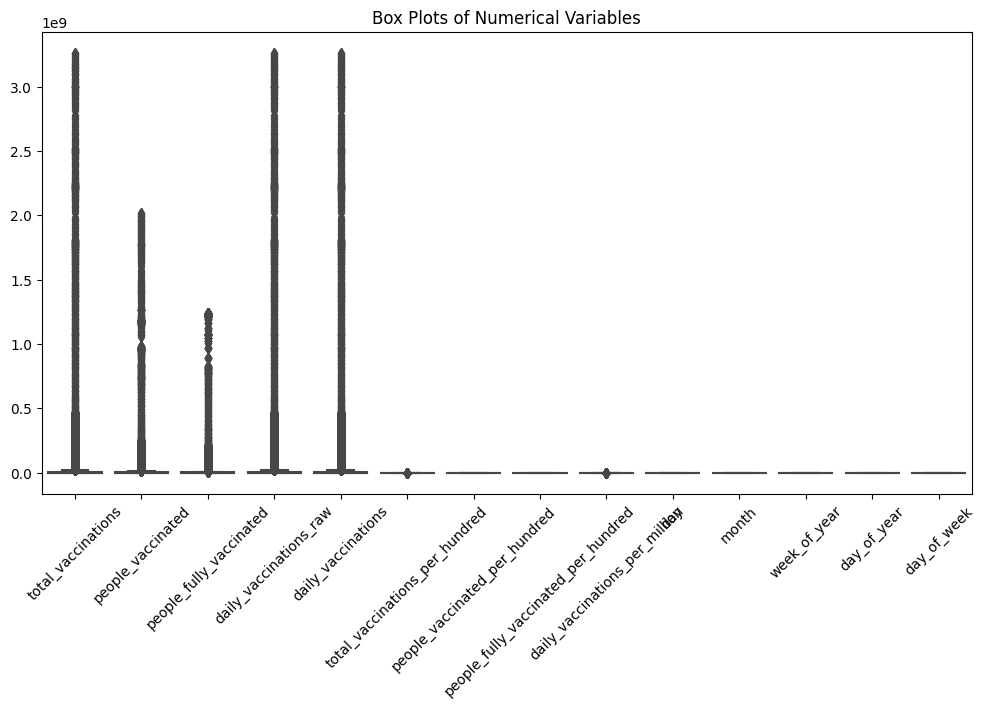

In [88]:
# Box plots for numerical columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()


<ipython-input-89-c14fcecc1bbf>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


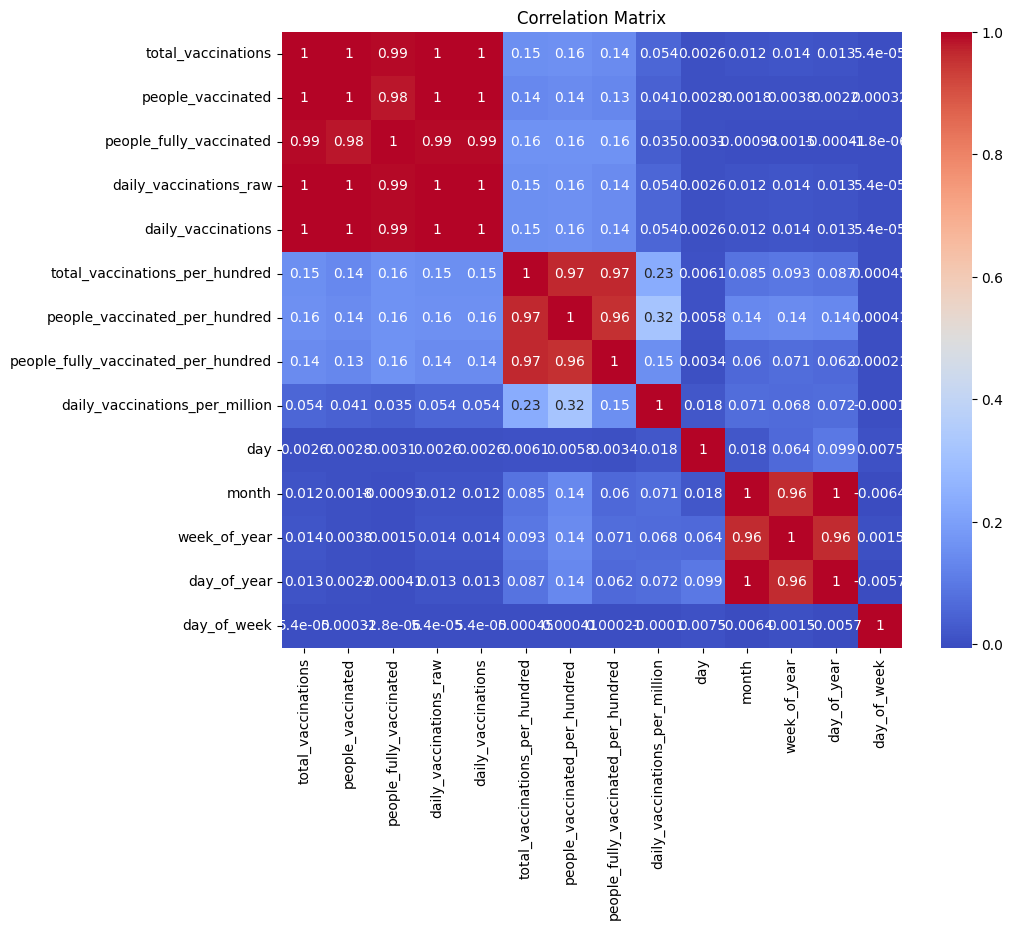

In [89]:
# Correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [90]:
group1 = df[df['daily_vaccinations'] == 'Group 1']['total_vaccinations']
group2 = df[df['daily_vaccinations'] == 'Group 2']['total_vaccinations']

t_stat, p_value = stats.ttest_ind(group1, group2)

if p_value < 0.05:
    print("There is a significant difference between Group 1 and Group 2.")
else:
    print("There is no significant difference between Group 1 and Group 2.")

There is no significant difference between Group 1 and Group 2.


In [91]:
t_stat, p_value = stats.ttest_ind(group1, group2)

In [92]:
alpha = 0.05  # Adjust alpha as needed
if p_value < alpha:
    print("Reject the null hypothesis (H0)")
else:
    print("Fail to reject the null hypothesis (H0)")

Fail to reject the null hypothesis (H0)


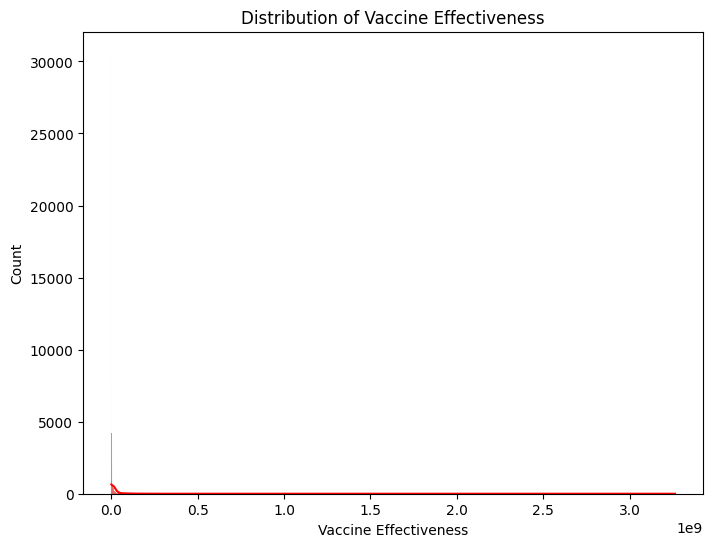

In [93]:

plt.figure(figsize=(8, 6))
sns.histplot(df['daily_vaccinations'], kde=True,color='red')
plt.title("Distribution of Vaccine Effectiveness")
plt.xlabel("Vaccine Effectiveness")
plt.ylabel("Count")
plt.show()

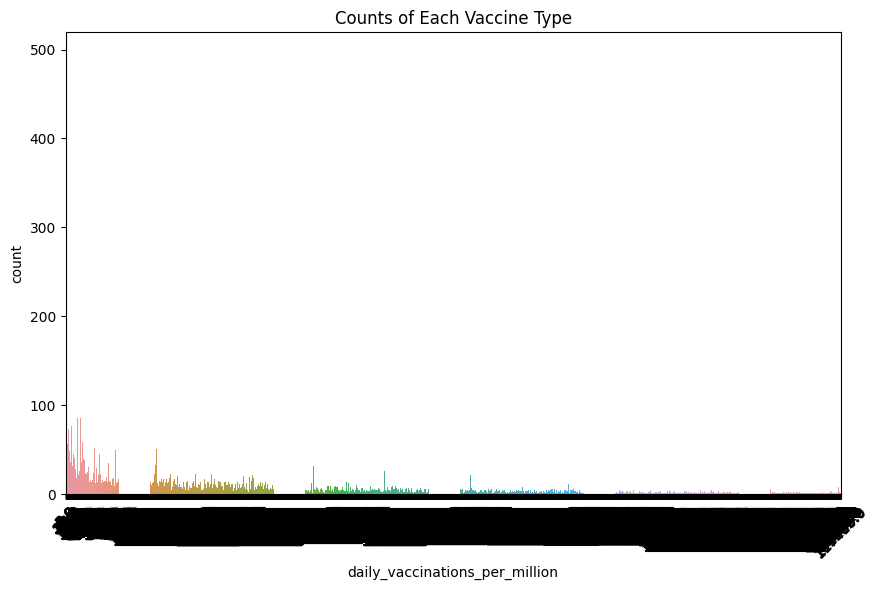

In [95]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='daily_vaccinations_per_million')
plt.title("Counts of Each Vaccine Type")
plt.xticks(rotation=45)
plt.show()

In [101]:
df.head()

,iso_code,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,day,month,week_of_year,day_of_year,day_of_week
0,AFG,0.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,22,2,8,53,0
1,AFG,1367.0,NaN,NaN,1367.0,1367.0,0.0,0.0,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,23,2,8,54,1
2,AFG,2734.0,NaN,NaN,2734.0,2734.0,0.0,0.0,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,24,2,8,55,2
3,AFG,4101.0,NaN,NaN,4101.0,4101.0,0.0,0.0,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,25,2,8,56,3
4,AFG,5468.0,NaN,NaN,5468.0,5468.0,0.0,0.0,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,26,2,8,57,4


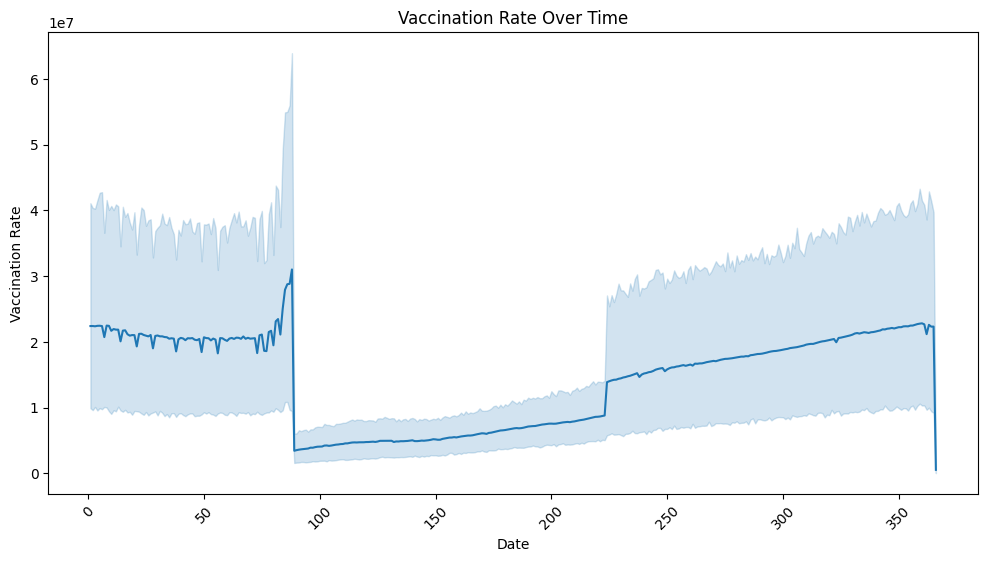

In [108]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='day_of_year', y='people_vaccinated')
plt.title("Vaccination Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Vaccination Rate")
plt.xticks(rotation=45)
plt.show()